<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Buildings-Data-2024---Post-Flood" data-toc-modified-id="Buildings-Data-2024---Post-Flood-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Buildings Data 2024 - Post Flood</a></span></li><li><span><a href="#Buildings-Data-2023---Pre-Flood" data-toc-modified-id="Buildings-Data-2023---Pre-Flood-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Buildings Data 2023 - Pre Flood</a></span></li><li><span><a href="#Damage-and-Flood-Area-Data" data-toc-modified-id="Damage-and-Flood-Area-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Damage and Flood Area Data</a></span></li><li><span><a href="#Municipality-and-Mahallah-Boundaries" data-toc-modified-id="Municipality-and-Mahallah-Boundaries-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Municipality and Mahallah Boundaries</a></span><ul class="toc-item"><li><span><a href="#Mahallah" data-toc-modified-id="Mahallah-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Mahallah</a></span></li></ul></li><li><span><a href="#Population-and-Demographic-Data" data-toc-modified-id="Population-and-Demographic-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Population and Demographic Data</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#EDA-Statistics" data-toc-modified-id="EDA-Statistics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>EDA Statistics</a></span></li><li><span><a href="#Flooding-&amp;-Damage" data-toc-modified-id="Flooding-&amp;-Damage-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Flooding &amp; Damage</a></span></li><li><span><a href="#Reconstruction-Progress" data-toc-modified-id="Reconstruction-Progress-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Reconstruction Progress</a></span></li><li><span><a href="#Environmental-Impact---Deforestation" data-toc-modified-id="Environmental-Impact---Deforestation-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Environmental Impact - Deforestation</a></span><ul class="toc-item"><li><span><a href="#Derna" data-toc-modified-id="Derna-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Derna</a></span></li><li><span><a href="#Libya-Summary" data-toc-modified-id="Libya-Summary-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Libya Summary</a></span></li></ul></li></ul></li></ul></div>

In [22]:
# utils
import os
import zipfile
import io

# data

import pandas as pd
import geopandas as gpd


# viz
import matplotlib.pyplot as plt
import folium


# geo
from fastkml import kml
import osmnx as ox
import fiona
from shapely.geometry import Point, Polygon, LineString, mapping, shape

from shapely import wkt

# GCP
from google.cloud import bigquery, secretmanager




In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/moe/code/moe221/GCP/taqarib-project-service-account.json"

In [5]:
def transform_geometry(df):

    ## Transform geometry
    df['geometry'] = df['geometry'].map(str).apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    gdf.set_crs("EPSG:4326", inplace=True)
    gdf = gdf.to_crs(epsg=4326)
    
    return gdf

# Load Data


## Buildings Data 2024 - Post Flood

In [6]:
gdf_buildings_libya_2024 = pd.read_csv('../data/building_data/gdf_buildings_libya_2024_06.csv')

## Transform geometry
# Convert the 'geometry' column to shapely geometries if not already
gdf_buildings_libya_2024 = transform_geometry(gdf_buildings_libya_2024)

## Buildings Data 2023 - Pre Flood

In [38]:
# Load the GeoPackage file
file_path = '../data/building_data/damages/OSM_2023_Export_New.geojson'  
gdf_derna_2023 = gpd.read_file(file_path)
gdf_derna_2023 = transform_geometry(gdf_derna_2023)

## Damage and Flood Area Data


In [7]:
# Specify the path to the geodatabase folder
gdb_path = '../data/building_data/damages/EMSR696_AOI01_GRA_PRODUCT_v1'  # Replace with the path to your .gdb folder

layers = fiona.listlayers(gdb_path)

df_derna_damage_list_new = []
if layers:
    
    for layer_name in layers:
        gdf = gpd.read_file(gdb_path, layer=layer_name)
        if gdf.empty:
            print("The GeoDataFrame is empty. The layer might not contain any data.")
        else:
            print(layer_name)
            gdf["layer_name"] = layer_name

            df_derna_damage_list_new.append(gdf)
            



EMSR696_AOI01_GRA_PRODUCT_transportationA_v1
EMSR696_AOI01_GRA_PRODUCT_facilitiesL_v1
EMSR696_AOI01_GRA_PRODUCT_areaOfInterestA_v1
EMSR696_AOI01_GRA_PRODUCT_imageFootprintA_v1
EMSR696_AOI01_GRA_PRODUCT_facilitiesA_v1
EMSR696_AOI01_GRA_PRODUCT_builtUpP_v1
EMSR696_AOI01_GRA_PRODUCT_transportationL_v1
EMSR696_AOI01_GRA_PRODUCT_observedEventA_v1
EMSR696_AOI01_GRA_PRODUCT_source_v1


In [493]:
# Extract Area of Interest
df_derna_area_of_interest = df_derna_damage_list_new[2].copy()
# Extract specific damage area
df_derna_damage_area = df_derna_damage_list_new[7].copy()

# extract structure and roads damages
df_derna_damaged_structures = pd.concat([df_derna_damage_list_new[4], df_derna_damage_list_new[5]])
df_derna_damaged_roads = df_derna_damage_list_new[6].copy()


# Transform Geometry
gdf_derna_damaged_structures = transform_geometry(df_derna_damaged_structures)
gdf_derna_damaged_roads = transform_geometry(df_derna_damaged_roads)
gdf_derna_area_of_interest = transform_geometry(df_derna_area_of_interest)
gdf_derna_damage_area = transform_geometry(df_derna_damage_area)

## Municipality and Mahallah Boundaries

### Mahallah

In [9]:
# Specify the path to the geodatabase folder
gdb_path = '../data/geo_data/boundaries/reach_lby_neighborhoods/'  # Replace with the path to your .gdb folder

layers = fiona.listlayers(gdb_path)

df_geo_boundareis_list = []
if layers:
    
    for layer_name in layers:
        gdf = gpd.read_file(gdb_path, layer=layer_name)
        if gdf.empty:
            print("The GeoDataFrame is empty. The layer might not contain any data.")
        else:
            print(layer_name)
            gdf["layer_name"] = layer_name

            df_geo_boundareis_list.append(gdf)

REACH_LBY_Neighborhoods


In [10]:
df_reach_boundaries = df_geo_boundareis_list[0].copy()
gdf_reach_boundaries = transform_geometry(df_reach_boundaries)

## Population and Demographic Data

In [12]:

project_id = "taqarib"
dataset_id = "taqarib"

client = bigquery.Client()

In [13]:
# Mahalla level boarders

table_id = "taqarib_admin_lvl_3_pop"


query = f""" SELECT *
                FROM `{project_id}.{dataset_id}.{table_id}` 
                """
query_job = client.query(query)
df_admin_lvl_3 = query_job.to_dataframe()

df_derna_mahalla = df_admin_lvl_3[df_admin_lvl_3["admin_lvl_1"]=="Derna"].copy()

In [14]:
# Distric level boarders
table_id = "taqarib_admin_lvl_1_pop"


query = f""" SELECT *
                FROM `{project_id}.{dataset_id}.{table_id}` 
                """
query_job = client.query(query)
df_admin_lvl_1 = query_job.to_dataframe()

df_derna_district = df_admin_lvl_1[df_admin_lvl_1["admin_lvl_1"]=="Derna"].copy()

In [16]:
## Transform geometry
gdf_derna_district = transform_geometry(df_derna_district)
## Transform geometry
gdf_derna_mahalla = transform_geometry(df_derna_mahalla)

# Data Cleaning

In [624]:
#### Bondaries data

gdf_reach_boundaries_clean = gdf_reach_boundaries[['source',
                             'date_data',
                             'mantika',
                             'baladiya',
                             'muhalla',
                             'admin0Name',
                             'admin0Pcod',
                             'admin1Pcod',
                             'admin1Name',
                             'admin2Name',
                             'admin2Pcod',
                             'Shape_Leng',
                             'Shape_Area',
                             'geometry',
                             'layer_name']].copy()


# get only Derna
gdf_reach_boundaries_derna = gdf_reach_boundaries_clean[gdf_reach_boundaries_clean["mantika"]=="Derna"].copy()


# remove neighborhoods. as we only need mahallah level data
# Group by the 'muhalla' attribute and combine polygons within each group
gdf_reach_boundaries_derna_clean = gdf_reach_boundaries_derna.dissolve(by='muhalla').reset_index().copy()



# Drawn manually
extensions = {
    "Alsayida Khadija": {"type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[22.549868,32.784316],[22.541285,32.78713],[22.560425,32.800334],[22.549868,32.784316]]]}},
    "Corsah": {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[22.541027,32.787202],[22.548172,32.792289],[22.549739,32.793083],[22.559416,32.800334],[22.553644,32.801957],[22.550039,32.801524],[22.546821,32.80156],[22.533731,32.800983],[22.524161,32.802354],[22.519999,32.803653],[22.519784,32.801055],[22.537594,32.797015],[22.528753,32.791171],[22.541027,32.787202]]]}}
}


# Function to merge polygons
def merge_polygons(area_name, df, extensions):
    # Get the existing polygon
    existing_geom = df.loc[df['muhalla'] == area_name, 'geometry'].values[0]
    
    # Get the extension geometry
    extension_geom = shape(extensions[area_name]['geometry'])
    
    # Merge the polygons
    if extension_geom.geom_type == 'Polygon':
        unified_geom = existing_geom.union(extension_geom)
    elif extension_geom.geom_type == 'LineString':
        # Convert LineString to Polygon by creating a buffer
        unified_geom = existing_geom.union(extension_geom.buffer(0.001)) # Adjust buffer size as needed
    
    # Update the DataFrame
    df.loc[df['muhalla'] == area_name, 'geometry'] = unified_geom
    
    return df

# Apply the merge for each area
for area in extensions.keys():
    gdf_reach_boundaries_derna_clean = merge_polygons(area, gdf_reach_boundaries_derna_clean, extensions)


In [625]:
for c in ['damage:date', 'damage:event', 'damage:type',
       'damaged:building', 'demolished', 'denomination', 'destroyed:bridge',
       'destroyed:building', 'destroyed:building:part', 'destroyed:highway']:
    print(c)
    print(gdf_derna_2023[c].unique())

damage:date
[None '2023-09-12' '2023-09-08']
damage:event
[None 'destroyed in Sept. 2023 during heavy rainfalls'
 'Dam destroyed in Sept. 2023 during heavy rainfall' '2023 Libya Flood'
 '2023 Morocco Earthquake']
damage:type
[None 'flood' 'earthquake']
damaged:building
[None 'yes']
demolished
[None 'yes']
denomination
[None 'sunni']
destroyed:bridge
[None 'yes']
destroyed:building
[None 'yes' 'residential']
destroyed:building:part
[None 'yes']
destroyed:highway
[None 'tertiary' 'trunk' 'residential' 'service' 'trunk_link'
 'tertiary_link' 'unclassified']


In [626]:
# Identify relevant columns that might indicate building types
relevant_columns = ['id', '@id', 'geometry', 'building', 'amenity', 'man_made', 'historic', 'shop', 'office', 'leisure']

# Create a subset of the data with only these columns
subset_data = gdf_derna_2023.copy()

# Function to determine the building type from relevant columns
def determine_building_type(row):
    for col in ['amenity', 'man_made', 'historic', 'shop', 'office', 'leisure']:
        if pd.notnull(row[col]):
            return row[col]
    return 'unknown'

# Function to determine the building type from relevant columns
def determine_damage(row):
    for col in ['damaged:building', 'demolished', 'destroyed:building', 'destroyed:building:part']:
        if pd.notnull(row[col]):
            if col =="damaged:building":
                return "Damaged"
            elif col=="demolished":
                return "Destroyed"
            elif col=="destroyed:building":
                return "Destroyed"
            elif col=="destroyed:building:part":
                return "Destroyed"
            return row[col]
    return None

# Apply the function to each row to create the building_type column
subset_data['building_type'] = subset_data.apply(determine_building_type, axis=1)
subset_data['building_type'] = subset_data.apply(lambda x: x["building"] if x["building_type"]=="unknown" else x["building_type"], axis=1)

# Damaged
subset_data['damage_gra'] = subset_data.apply(determine_damage, axis=1)


# Select and rename the required columns
gdf_derna_2023_clean = subset_data[['id', 'geometry', 'building_type', "damage_gra"]]

In [627]:
gdf_derna_2023_clean["damage_gra"].value_counts()

damage_gra
Destroyed    519
Damaged        1
Name: count, dtype: int64

In [628]:
gdf_reach_boundaries_derna_clean

,muhalla,geometry,source,date_data,mantika,baladiya,admin0Name,admin0Pcod,admin1Pcod,admin1Name,admin2Name,admin2Pcod,Shape_Leng,Shape_Area,layer_name
0,Abu Mansour,"POLYGON ((22.64971 32.75815, 22.64923 32.75754...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
1,Ain Mara,"POLYGON ((22.39153 32.74796, 22.39304 32.74864...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
2,Al-Bilad,"POLYGON ((22.64756 32.77023, 22.64842 32.76916...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
3,Al-Jubailah,"POLYGON ((22.64136 32.76482, 22.64108 32.76450...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
4,Al-Maghar,"POLYGON ((22.62422 32.75157, 22.62224 32.75175...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
5,Alsahil,"POLYGON ((22.67836 32.75043, 22.67875 32.75048...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
6,Alsayida Khadija,"POLYGON ((22.58474 32.77791, 22.58460 32.77635...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
7,Corsah,"POLYGON ((22.52861 32.79121, 22.52507 32.79174...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
8,El Fataieh,"POLYGON ((22.67713 32.67252, 22.67600 32.67200...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods
9,La Troun,"POLYGON ((22.27505 32.86755, 22.27514 32.86779...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods


# Data Preprocessing

In [629]:
### Buildings Post Flood

derna_polygon = gdf_derna_district["geometry"].unique()[0]


# Calculate the centroid of each polygon to transform them into points
gdf_buildings_libya_2024['centroid'] = gdf_buildings_libya_2024.geometry.centroid


# Check if the centroids fall within the Derna polygon and add a column
gdf_buildings_libya_2024['location'] = gdf_buildings_libya_2024.centroid.apply(lambda x: 'Derna' if derna_polygon.contains(x) else 'Other')

gdf_buildings_derna_2024 = gdf_buildings_libya_2024[gdf_buildings_libya_2024["location"]=="Derna"].copy()


In [630]:

# Perform a spatial join to map each building centroid to its corresponding mahallah
gdf_derna_damaged_structures = gpd.sjoin(gdf_derna_damaged_structures, gdf_reach_boundaries_derna_clean[["mantika",
                                                                                                         "baladiya",
                                                                                                         "muhalla",
                                                                                                         "geometry"]],
                                         how="left",
                                         predicate="within")

gdf_derna_damaged_structures.drop(columns=["index_right"], inplace=True)



# replace Possibly damaged with damaged

gdf_derna_damaged_structures["damage_gra"] = gdf_derna_damaged_structures["damage_gra"].apply(lambda x: "Damaged" if x=="Possibly damaged" else x)



In [631]:

# Perform a spatial join to map each building centroid to its corresponding mahallah
gdf_buildings_derna_2024 = gpd.sjoin(gdf_buildings_derna_2024, gdf_reach_boundaries_derna_clean[["mantika",
                                                                                                 "baladiya",
                                                                                                 "muhalla",
                                                                                                 "geometry"]],
                                     how="left",
                                     predicate="within")
gdf_buildings_derna_2024.drop(columns=["index_right"], inplace=True)

# map area of interest
gdf_buildings_derna_2024 = gpd.sjoin(gdf_buildings_derna_2024, df_derna_area_of_interest[["locality", "geometry"]], 
                                     how="left",
                                     predicate="within")
gdf_buildings_derna_2024.drop(columns=["index_right"], inplace=True)

# map flood area

gdf_buildings_derna_2024 = gpd.sjoin(gdf_buildings_derna_2024,
                                           gdf_derna_damage_area[["notation", "geometry"]],
                                     how="left",
                                     predicate="intersects")

gdf_buildings_derna_2024.drop(columns=["index_right"], inplace=True)



In [632]:
### Buildings Pre Flood

gdf_derna_2023_clean = gdf_derna_2023_clean[["id", "building_type", "geometry", "damage_gra"]].copy()

# map area of interest
# Perform a spatial join to map each building centroid to its corresponding mahallah
gdf_derna_2023_clean = gpd.sjoin(gdf_derna_2023_clean, gdf_reach_boundaries_derna_clean[["mantika",
                                                                                         "baladiya",
                                                                                         "muhalla",
                                                                                         "geometry"]],
                                         how="left",
                                         predicate="within")

gdf_derna_2023_clean.drop(columns=["index_right"], inplace=True)




# map area of interest
gdf_derna_2023_clean = gpd.sjoin(gdf_derna_2023_clean, df_derna_area_of_interest[["locality", "geometry"]], 
                                     how="left",
                                     predicate="within")

gdf_derna_2023_clean.drop(columns=["index_right"], inplace=True)

# map flood area

gdf_derna_2023_clean = gpd.sjoin(gdf_derna_2023_clean,
                                           gdf_derna_damage_area[["notation", "geometry"]],
                                     how="left",
                                     predicate="intersects")

gdf_derna_2023_clean.drop(columns=["index_right"], inplace=True)


In [633]:
def map_building_type(building_type):
    if building_type in ['residential', 'house', 'apartments', 'yes']:
        return 'Residential'
    elif building_type in ['school', 'college', 'university']:
        return 'Educational'
    elif building_type in ['hospital', 'clinic', 'pharmacy']:
        return 'Healthcare'
    elif building_type in ['place_of_worship', 'mosque', "place_of_worship"]:
        return 'Religious'
    elif building_type in ['commercial', 'mall', 'bank', 'post_office']:
        return 'Commercial and Services'
    elif building_type in ['industrial', 'wastewater_plant', 'water_tower', 'storage_tank', 'fuel']:
        return 'Industrial and Infrastructure'
    elif building_type in ['stadium', 'library', 'cinema', 'events_venue']:
        return 'Recreational and Cultural'
    elif building_type in ['police', 'fire_station']:
        return 'Government and Safety'
    elif building_type in ['ruins', 'archaeological_site', 'castle']:
        return 'Historical and Archaeological'
    else:
        return 'Miscellaneous'

# Apply the function to create a new column with grouped building types
gdf_derna_2023_clean['building_group'] = gdf_derna_2023_clean['building_type'].apply(map_building_type)

# Data Analysis

In [634]:
color_palete = [
    '#12264d',
    '#18336c',
    '#1a3a90',
    '#3d5893',
    '#2c77d8',
    '#70bbff',
    '#166c6b',
    '#05837c',
    '#2c837d',
    '#38a59d',
    '#74c6be'
]

color_palete_heat = [
    '#2c837d',
    '#38a59d',
    '#ffc100',
    '#ff9a00',
    '#ff0000'
]


color_palete_damage = [
    '#77dd77',
    '#ffb347',
    '#ff6961',
]

In [635]:

import plotly.graph_objects as go
import plotly.express as px
import leafmap.foliumap as leafmap


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## EDA Statistics

In [636]:
gdf_reach_boundaries_derna_clean["area_km2"] = gdf_reach_boundaries_derna_clean['geometry'].area * 10000


# Calculate the number of buildings per muhalla
buildings_per_muhalla = gdf_derna_2023_clean.groupby("muhalla").count()[["id"]].reset_index()

buildings_per_muhalla["muhalla_area"] = buildings_per_muhalla["muhalla"].map(dict(zip(gdf_reach_boundaries_derna_clean["muhalla"], gdf_reach_boundaries_derna_clean["area_km2"])))

In [623]:
buildings_per_muhalla

,id,muhalla_area,building_density,building_proportion
muhalla,,,,
Abu Mansour,1335,1.372790,972.472191,0.063894
Ain Mara,439,1.182497,371.248313,0.021011
Al-Bilad,1406,1.159097,1213.013491,0.067292
Al-Jubailah,2533,2.367317,1069.987680,0.121231
Al-Maghar,3608,5.001789,721.341912,0.172681
Alsahil,4041,4.143717,975.211319,0.193405
Alsayida Khadija,1273,5.286447,240.804445,0.060927
Corsah,1411,16.736956,84.304457,0.067531
El Fataieh,2985,80.771033,36.956318,0.142864


In [637]:
## population and age distribution per mahallah
buildings_per_muhalla["building_density"] = buildings_per_muhalla["id"] / buildings_per_muhalla["muhalla_area"]
buildings_per_muhalla.set_index("muhalla", inplace=True)

buildings_per_muhalla["building_proportion"] = buildings_per_muhalla["id"]/buildings_per_muhalla["id"].sum()
buildings_per_muhalla["nr_buildings"] = buildings_per_muhalla["id"]

gdf_reach_boundaries_derna_clean = gdf_reach_boundaries_derna_clean.merge(buildings_per_muhalla[["nr_buildings",
                                                                                                 "building_density",
                                                                                                 "building_proportion"]].reset_index(),
                                       how="left",
                                       on="muhalla")

gdf_derna_population = gdf_derna_mahalla[gdf_derna_mahalla["admin_lvl_2"]=="Derna"].copy()
gdf_derna_population

map_alsahil = ["Albakoush", "Hai Arbamia", "Fatima Alzahra"]

gdf_derna_population["admin_lvl_3"] = gdf_derna_population["admin_lvl_3"].apply(lambda x: "Alsahil" if x in map_alsahil else x)
gdf_derna_population["adm_code_lvl_3"] = gdf_derna_population.apply(lambda x: "LY01010201_1" if x["admin_lvl_3"] == "Alsahil" else x["adm_code_lvl_3"], axis=1)

total_derna_population = gdf_derna_population["population"].sum()
gdf_reach_boundaries_derna_clean["population_total"] = round(gdf_reach_boundaries_derna_clean["building_proportion"] * total_derna_population)
gdf_reach_boundaries_derna_clean["population_density"] = gdf_reach_boundaries_derna_clean["population_total"]/gdf_reach_boundaries_derna_clean["area_km2"]



In [638]:
gdf_reach_boundaries_derna_clean.head(1)

,muhalla,geometry,source,date_data,mantika,baladiya,admin0Name,admin0Pcod,admin1Pcod,admin1Name,admin2Name,admin2Pcod,Shape_Leng,Shape_Area,layer_name,area_km2,nr_buildings,building_density,building_proportion,population_total,population_density
0,Abu Mansour,"POLYGON ((22.64971 32.75815, 22.64923 32.75754...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,1.37279,1335,972.472191,0.063894,7174.0,5225.854306


In [639]:
fig = px.histogram(data_frame=gdf_reach_boundaries_derna_clean.sort_values(by="population_total", ascending=False),
                   y="muhalla",
                   x="population_total",
                   labels={"population_total": "Population"},
                   title=f'Population per Mahallah - Derna City',
                   barmode="stack",
                   text_auto=True,
                   color="muhalla",
                   orientation="h", 
                   color_discrete_sequence=color_palete)

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=False,  # Hide the legend
                  title_x=0.1)  # Center the title

fig.update_layout(xaxis_title="Population")
fig.update_layout(yaxis_title="Mahallah")
fig.update_layout(yaxis={'nticks':20})

fig.update_traces(texttemplate='%{x:.3s}')  # Format text on bars
fig.update_xaxes(ticksuffix='', tickformat="~s")  # Use ~s for thousands and millions formatting

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing the population size of each mahalla based on 2023 cenus data [Estimated]",
    xref="paper", yref="paper",
    x=0.87, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()

In [640]:
# Create the doughnut chart
fig = px.pie(data_frame=gdf_reach_boundaries_derna_clean.sort_values(by="population_total", ascending=False),
             names="muhalla",
             values="population_total",
             title='Population Distribution per Mahallah - Derna City',
             color="muhalla",
             color_discrete_sequence=color_palete,
             hole=0.3)  # Creates the hole in the middle for the doughnut chart

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=False,  # Hide the legend
                  title_x=0.1)  # Center the title

# Format the annotations to show percentages
fig.update_traces(textinfo='percent', texttemplate='%{percent:.1%}')

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=True,  # Show the legend
                  title_x=0.1,  # Center the title
                  legend=dict(
                      orientation="h",  # Horizontal orientation
                      yanchor="bottom",  # Anchor to the bottom of the legend box
                      y=-0.3,  # Position above the chart
                      xanchor="center",  # Center the legend horizontally
                      x=0.5  # Center the legend
                  ))

# Add subtitle as an annotation
fig.add_annotation(
    text="Doughnut chart showing the population distribution between mahallahs in % based on 2023 census data [Estimated]",
    xref="paper", yref="paper",
    x=1.23, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()


In [641]:
# Buldings per mahallah

In [642]:
df_plot = gdf_derna_2023_clean[~gdf_derna_2023_clean["muhalla"].isna()].groupby(["muhalla"])[["id"]].count().reset_index()


In [643]:
fig = px.histogram(data_frame=df_plot.sort_values(by="id", ascending=False),
                   y="muhalla",
                   x="id",
                   labels={"id": "Number of Buildings"},
                   title=f'Number of Buildings per Mahallah - Derna City',
                   barmode="stack",
                   text_auto=True,
                   color="muhalla",
                   orientation="h", 
                   color_discrete_sequence=color_palete)

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=False,  # Hide the legend
                  title_x=0.1)  # Center the title

fig.update_layout(xaxis_title="Number of Buildings")
fig.update_layout(yaxis_title="Mahallah")
fig.update_layout(yaxis={'nticks':20})

fig.update_traces(texttemplate='%{x:.3s}')  # Format text on bars
fig.update_xaxes(ticksuffix='', tickformat="~s")  # Use ~s for thousands and millions formatting

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing the Number of Buildings in each mahalla - 2023",
    xref="paper", yref="paper",
    x=0.59, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()

In [644]:
gdf_reach_boundaries_derna_clean.head(1)

,muhalla,geometry,source,date_data,mantika,baladiya,admin0Name,admin0Pcod,admin1Pcod,admin1Name,admin2Name,admin2Pcod,Shape_Leng,Shape_Area,layer_name,area_km2,nr_buildings,building_density,building_proportion,population_total,population_density
0,Abu Mansour,"POLYGON ((22.64971 32.75815, 22.64923 32.75754...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,1.37279,1335,972.472191,0.063894,7174.0,5225.854306


In [645]:
fig = px.histogram(data_frame=gdf_reach_boundaries_derna_clean.sort_values(by="building_proportion", ascending=False),
                   y="muhalla",
                   x="area_km2",
                   labels={"id": "Area in Sq Km"},
                   title=f'Mahallah Size in Square Kilometer - Derna',
                   barmode="stack",
                   text_auto=True,
                   color="muhalla",
                   orientation="h", 
                   color_discrete_sequence=color_palete)

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=False,  # Hide the legend
                  title_x=0.1)  # Center the title

fig.update_layout(xaxis_title="area_km2")
fig.update_layout(yaxis_title="Mahallah")
fig.update_layout(yaxis={'nticks':20})

fig.update_traces(texttemplate='%{x:.2f} Km2')  # Format text on bars
fig.update_xaxes(ticksuffix='Km2', tickformat="")  # Use ~s for thousands and millions formatting

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing the Size of each mahalla",
    xref="paper", yref="paper",
    x=0.59, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()

In [646]:
# Number of Critical Infrastructures - schools, hospitals, clinics, police stations, fire stations per mahallah

In [647]:
df_plot = gdf_derna_2023_clean[~gdf_derna_2023_clean["muhalla"].isna()].groupby(["building_group"])[["id"]].count().reset_index()
df_plot

,building_group,id
0,Commercial and Services,1
1,Educational,32
2,Government and Safety,2
3,Healthcare,18
4,Historical and Archaeological,2
5,Industrial and Infrastructure,9
6,Miscellaneous,750
7,Recreational and Cultural,4
8,Religious,41
9,Residential,20035


In [648]:

fig = px.histogram(data_frame=df_plot.sort_values(by="id", ascending=False),
                   y="building_group",
                   x="id",
                   labels={"building_typel": "Building Type"},
                   title=f'Distribution of Buildings & Facilities in Derna',
                   barmode="stack",
                   text_auto=True,
                   color="building_group",
                   orientation="h", 
                   color_discrete_sequence=color_palete)

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=False,  # Hide the legend
                  title_x=0.1)  # Center the title

fig.update_layout(xaxis_title="Countr")
fig.update_layout(yaxis_title="Building Type")
fig.update_layout(yaxis={'nticks':20})

fig.update_traces(texttemplate='%{x:.1s}')  # Format text on bars
fig.update_xaxes(ticksuffix='', tickformat="~s")  # Use ~s for thousands and millions formatting

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing the number of buildings by function",
    xref="paper", yref="paper",
    x=0.385, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()

In [649]:
df_plot = gdf_derna_2023_clean[~gdf_derna_2023_clean["muhalla"].isna()].groupby(["muhalla", "building_group"])[["id"]].count().reset_index()
df_plot = df_plot[df_plot["building_group"].isin(["Educational",
                                        "Healthcare",
                                        "Religious",
                                        "Government and Safety"])]

In [650]:
fig = px.histogram(data_frame=df_plot.sort_values(by=["muhalla", "id"], ascending=[False, False]),
                   x="muhalla",
                   y="id",
                   labels={"building_typel": "Building Type"},
                   title=f'Distribution of Critical Facilities per Mahallah',
                   barmode="group",
                   text_auto=True,
                   color="building_group",
                   orientation="v", 
                   color_discrete_sequence=color_palete[4:])

fig.update_layout(width=800,
                  height=650,
                  font=dict(size=12),
                  showlegend=False,  # Hide the legend
                  title_x=0.1)  # Center the title

fig.update_layout(xaxis_title="Mahallah")
fig.update_layout(yaxis_title="Count")

fig.update_xaxes(ticksuffix='', tickformat="~s")  # Use ~s for thousands and millions formatting

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=True,  # Show the legend
                  title_x=0.1,  # Center the title
                  legend=dict(
                      title="Facility Type",
                      orientation="h",  # Horizontal orientation
                      yanchor="bottom",  # Anchor to the bottom of the legend box
                      y=-0.38,  # Position above the chart
                      xanchor="center",  # Center the legend horizontally
                      x=0.5  # Center the legend
                  ))

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing types of facilities in each mahalla",
    xref="paper", yref="paper",
    x=0.485, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()

In [651]:
df_plot = gdf_derna_2023_clean[gdf_derna_2023_clean["building_group"].isin(["Educational",
                                                                            "Healthcare",
                                                                            "Religious",
                                                                            "Government and Safety"])]

df_plot = df_plot[~df_plot["muhalla"].isna()]

In [652]:
gdf_derna_2023_clean

,id,building_type,geometry,damage_gra,mantika,baladiya,muhalla,locality,notation,building_group
0,relation/11357713,yes,"MULTIPOLYGON (((22.57366 32.78515, 22.57366 32...",None,Derna,Derna,Alsayida Khadija,Derna,NaN,Residential
1,relation/11521479,yes,"POLYGON ((22.23321 32.73874, 22.23322 32.73872...",None,NaN,NaN,NaN,NaN,NaN,Residential
2,relation/11521480,yes,"POLYGON ((22.23338 32.73850, 22.23339 32.73849...",None,NaN,NaN,NaN,NaN,NaN,Residential
3,relation/11521481,yes,"POLYGON ((22.23359 32.73826, 22.23360 32.73824...",None,NaN,NaN,NaN,NaN,NaN,Residential
4,relation/12522498,yes,"POLYGON ((22.68778 32.68909, 22.68812 32.68926...",None,Derna,Derna,El Fataieh,NaN,NaN,Residential
...,...,...,...,...,...,...,...,...,...,...
27010,node/9579238377,school,POINT (22.14442 32.77981),None,NaN,NaN,NaN,NaN,NaN,Educational
27011,node/9579272605,place_of_worship,POINT (22.27768 32.78251),None,NaN,NaN,NaN,NaN,NaN,Religious
27012,node/11083608905,place_of_worship,POINT (22.16850 32.66531),None,NaN,NaN,NaN,NaN,NaN,Religious
27013,node/11190994885,tower,POINT (22.58267 32.76715),None,NaN,NaN,NaN,NaN,NaN,Miscellaneous


In [653]:
# Mapping facility types to colors and icons
facility_styles = {
    "Educational": {"color": "darkblue", "icon": "fa-book"},
    "Healthcare": {"color": "green", "icon": "fa-plus-square"},
    "Religious": {"color": "red", "icon": "fa-moon"},
    "Government and Safety": {"color": "black", "icon": "fa-flag"}
}


m = leafmap.Map(height='700px')

# Add Google satellite basemap
m.add_basemap('SATELLITE')

# Add the GeoDataFrame with custom styling
for idx, row in df_plot.iterrows():
    style = facility_styles.get(row["building_group"], {"color": "blue", "icon": "fa-info-circle"})
    
    icon_html = f"""
    <div style="font-size: 9px; color: {style['color']}">
        <i class="fa {style['icon']}"></i>
    </div>
    """
    icon = folium.DivIcon(html=icon_html)
    
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        icon=folium.Icon(color=style["color"], icon=style["icon"], prefix='fa'),
        popup=f'{row["building_group"]}'
    ).add_to(m)

# Add a legend
legend_html = '''
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
<div style="position: fixed; 
            bottom: 50px; left: 700px; width: 250px; height: 150px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; padding: 10px;">
    &nbsp; <b>Facility Types</b> <br>
    &nbsp; <span style="color:darkblue"><i class="fa fa-book"></i>&nbsp; Educational</span> <br>
    &nbsp; <span style="color:green"><i class="fa fa-plus-square"></i>&nbsp; Healthcare</span> <br>
    &nbsp; <span style="color:red"><i class="fa fa-moon"></i>&nbsp; Religious</span> <br>
    &nbsp; <span style="color:black"><i class="fa fa-flag"></i>&nbsp; Government and Safety</span> <br>
</div>
'''



m.get_root().html.add_child(folium.Element(legend_html))

m.add_gdf(gdf_reach_boundaries_derna_clean[["geometry", "muhalla"]],
          layer_name='Mahallah',
          zoom_to_layer=True,
          style={"color": "white", "fillColor": "blue", "fillOpacity": 0.3})

title_html = '''
    <h3 align="center" style="font-size:20px"><b>Derna City Critical Facilities Map</b></h3>
    '''
m.get_root().html.add_child(folium.Element(title_html))

# Display the map
m

In [654]:
import branca.colormap as cm
import folium
from shapely.geometry import Point

# Create the map
m = leafmap.Map(height='650px', width="1000")

# Add Google satellite basemap
m.add_basemap('SATELLITE')


# Normalize the building_density values for the color scale
min_count = gdf_reach_boundaries_derna_clean['building_density'].min()
max_count = gdf_reach_boundaries_derna_clean['building_density'].max()
colormap = cm.LinearColormap(color_palete_heat, vmin=min_count, vmax=max_count)

# Define a function to assign colors based on the "building_density" column
def style_function(feature):
    count_affected = feature['properties']['building_density']
    return {
        'color': 'black',
        'fillColor': colormap(count_affected),
        'fillOpacity': 0.7,
        'weight': 0.5
    }

# Add the GeoDataFrame with custom styling based on building_density
m.add_gdf(
    gdf_reach_boundaries_derna_clean,
    layer_name='Affected Areas Heatmap',
    zoom_to_layer=True,
    style_function=style_function
)



# Add the colormap to the map
colormap.caption = 'Building Density - per Square Kilometer'
colormap.add_to(m)



# Calculate the centroid for each polygon and add a label
for idx, row in gdf_reach_boundaries_derna_clean.iterrows():
    centroid = row['geometry'].centroid
    folium.map.Marker(
        [centroid.y, centroid.x],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 12; color : white; font-weight: bold;">{row["muhalla"]}</div>'
        )
    ).add_to(m)
    

    
    
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Building Density Heatmap - Derna</b></h3>
    '''
m.get_root().html.add_child(folium.Element(title_html))

colormap.caption_style = {'color': 'white', 'font-weight': 'bold'}


# Display the map
m


In [655]:
import branca.colormap as cm
import folium
from shapely.geometry import Point

# Create the map
m = leafmap.Map(height='650px', width="1000")

# Add Google satellite basemap
m.add_basemap('SATELLITE')


# Normalize the building_density values for the color scale
min_count = gdf_reach_boundaries_derna_clean['population_density'].min()
max_count = gdf_reach_boundaries_derna_clean['population_density'].max()
colormap = cm.LinearColormap(color_palete_heat, vmin=min_count, vmax=max_count)

# Define a function to assign colors based on the "building_density" column
def style_function(feature):
    count_affected = feature['properties']['population_density']
    return {
        'color': 'black',
        'fillColor': colormap(count_affected),
        'fillOpacity': 0.7,
        'weight': 0.5
    }

# Add the GeoDataFrame with custom styling based on building_density
m.add_gdf(
    gdf_reach_boundaries_derna_clean,
    layer_name='Affected Areas Heatmap',
    zoom_to_layer=True,
    style_function=style_function
)



# Add the colormap to the map
colormap.caption = 'Population Density - per Square Kilometer'
colormap.add_to(m)



# Calculate the centroid for each polygon and add a label
for idx, row in gdf_reach_boundaries_derna_clean.iterrows():
    centroid = row['geometry'].centroid
    folium.map.Marker(
        [centroid.y, centroid.x],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 12; color : white; font-weight: bold;">{row["muhalla"]}</div>'
        )
    ).add_to(m)
    

    
    
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Population Density Heatmap - Derna</b></h3>
    '''
m.get_root().html.add_child(folium.Element(title_html))

colormap.caption_style = {'color': 'white', 'font-weight': 'bold'}


# Display the map
m


In [656]:

gdf_reach_boundaries_derna_clean


,muhalla,geometry,source,date_data,mantika,baladiya,admin0Name,admin0Pcod,admin1Pcod,admin1Name,admin2Name,admin2Pcod,Shape_Leng,Shape_Area,layer_name,area_km2,nr_buildings,building_density,building_proportion,population_total,population_density
0,Abu Mansour,"POLYGON ((22.64971 32.75815, 22.64923 32.75754...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,1.372790,1335,972.472191,0.063894,7174.0,5225.854306
1,Ain Mara,"POLYGON ((22.39153 32.74796, 22.39304 32.74864...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,1.182497,439,371.248313,0.021011,2359.0,1994.931138
2,Al-Bilad,"POLYGON ((22.64756 32.77023, 22.64842 32.76916...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,1.159097,1406,1213.013491,0.067292,7556.0,6518.869088
3,Al-Jubailah,"POLYGON ((22.64136 32.76482, 22.64108 32.76450...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,2.367317,2533,1069.987680,0.121231,13612.0,5749.969324
4,Al-Maghar,"POLYGON ((22.62422 32.75157, 22.62224 32.75175...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,5.001789,3608,721.341912,0.172681,19389.0,3876.413061
5,Alsahil,"POLYGON ((22.67836 32.75043, 22.67875 32.75048...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,4.143717,4041,975.211319,0.193405,21716.0,5240.705025
6,Alsayida Khadija,"POLYGON ((22.58474 32.77791, 22.58460 32.77635...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,5.286447,1273,240.804445,0.060927,6841.0,1294.063790
7,Corsah,"POLYGON ((22.52861 32.79121, 22.52507 32.79174...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,16.736956,1411,84.304457,0.067531,7583.0,453.069240
8,El Fataieh,"POLYGON ((22.67713 32.67252, 22.67600 32.67200...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,80.771033,2985,36.956318,0.142864,16041.0,198.598426
9,La Troun,"POLYGON ((22.27505 32.86755, 22.27514 32.86779...",FGD,2022,Derna,Derna,Libya,LY,LY01,East,Derna,LY0101,0.0,0.0,REACH_LBY_Neighborhoods,0.137246,50,364.309836,0.002393,269.0,1959.986920


## Flooding & Damage

- Number of affected buildings - total/per mahalla
- Flood Area Size
- Number of total people affected
- % of total people affected overall vs per mahallah

In [657]:
gdf_derna_damaged_structures.head(1)

,obj_type,name,info,simplified,damage_gra,det_method,notation,or_src_id,dmg_src_id,cd_value,geometry,layer_name,mantika_left,baladiya_left,muhalla_left,mantika_right,baladiya_right,muhalla_right,mantika,baladiya,muhalla
0,24-Other Civil Engineering Works,Unknown,2412-Other sport and recreation constructions,Sport and recreation constructions,Damaged,Photo-interpretation,Not Applicable,994,4,Not Applicable,"POLYGON ((22.62953 32.76537, 22.62950 32.76521...",EMSR696_AOI01_GRA_PRODUCT_facilitiesA_v1,Derna,Derna,Al-Jubailah,Derna,Derna,Al-Jubailah,Derna,Derna,Al-Jubailah


In [658]:
color_palete_damage

['#77dd77', '#ffb347', '#ff6961']

In [659]:

df_plot = gdf_derna_damaged_structures.copy()
df_plot = df_plot.groupby(["damage_gra"])[["name"]].count().reset_index()
df_plot["sorting"] = df_plot["damage_gra"].map({"Damaged": 2, "Possibly damaged": 1, "Destroyed": 3})


fig = px.histogram(data_frame=df_plot.sort_values(by="sorting", ascending=True),
                   x="damage_gra",
                   y="name",
                   labels={"damage_gra": "Number of Buildings"},
                   title=f'Number of Affected Buildings - Derna - Total',
                   barmode="stack",
                   text_auto=True,
                   color="damage_gra",
                   orientation="v", 
                   color_discrete_sequence=color_palete_damage[1:])

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=False,  # Hide the legend
                  title_x=0.1)  # Center the title

fig.update_layout(yaxis_title="Number of Buildings")
fig.update_layout(xaxis_title="Damage Type")

fig.update_traces(texttemplate='%{y:.2s}')  # Format text on bars
fig.update_yaxes(ticksuffix='', tickformat="~s")  # Use ~s for thousands and millions formatting

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing the Number of Buildings in each mahalla - 2023",
    xref="paper", yref="paper",
    x=0.63, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()

In [660]:

# Assume df_plot is your input DataFrame
df_plot = gdf_derna_damaged_structures.copy()
df_plot = df_plot.groupby(["muhalla", "damage_gra"])[["name"]].count().reset_index()

df_plot["sorting"] = df_plot["damage_gra"].map({"Damaged": 2, "Possibly damaged": 1, "Destroyed": 3})

# Calculate the total number of buildings affected per "muhalla" for sorting
df_totals = df_plot.groupby('muhalla')[['name']].sum().reset_index().sort_values(by='name', ascending=False)

# Merge the sorted totals back to the original DataFrame
df_plot_sorted = pd.merge(df_plot, df_totals, on='muhalla', suffixes=('', '_total'))

# Sort the DataFrame by the total number of buildings affected and the damage grading
df_plot_sorted = df_plot_sorted.sort_values(by=['name_total', 'sorting'], ascending=[True, True])

# Plot the histogram
fig = px.histogram(data_frame=df_plot_sorted,
                   y="muhalla",
                   x="name",
                   labels={"name": "Number of Buildings"},
                   title=f'Number of Affected Buildings - Derna - Total',
                   barmode="stack",
                   text_auto=True,
                   color="damage_gra",
                   orientation="h",
                   color_discrete_sequence=color_palete_damage[1:])

fig.update_layout(width=900,
                  height=550,
                  font=dict(size=12),
                  showlegend=True,  # Show the legend
                  title_x=0.1,  # Center the title
                  legend=dict(
                      title="Damage Type",
                      orientation="h",  # Horizontal orientation
                      yanchor="bottom",  # Anchor to the bottom of the legend box
                      y=-0.38,  # Position above the chart
                      xanchor="center",  # Center the legend horizontally
                      x=0.5  # Center the legend
                  ))

fig.update_layout(xaxis_title="Number of Buildings")
fig.update_layout(yaxis_title="Mahallah")

fig.update_traces(texttemplate='%{x:.2s}')  # Format text on bars
fig.update_xaxes(ticksuffix='', tickformat="~s")  # Use ~s for thousands and millions formatting

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing the Number of Buildings in each mahalla - 2023",
    xref="paper", yref="paper",
    x=0.52, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()


In [661]:
# Affected buildings % per mahallah

In [662]:
df_plot_all = gdf_derna_2023_clean.groupby(["muhalla"])[["id"]].count().reset_index()
df_plot_all = df_plot_all.rename(columns={"id": "total"})

df_plot_damage = gdf_derna_damaged_structures.groupby(["muhalla"])[["name"]].count().reset_index()
df_plot_damage = df_plot_damage.rename(columns={"name": "affected"})

df_plot_all = df_plot_all.merge(df_plot_damage, on="muhalla", how="left").fillna(0.1)
df_plot_all["percentage_affected"] = (df_plot_all["affected"]/ df_plot_all["total"]) * 100
df_plot_all["affected_flag"] = df_plot_all["affected"].apply(lambda x: True if x > 0.1 else False)
df_plot_all

,muhalla,total,affected,percentage_affected,affected_flag
0,Abu Mansour,1335,196.0,14.681648,True
1,Ain Mara,439,0.1,0.022779,False
2,Al-Bilad,1406,1187.0,84.423898,True
3,Al-Jubailah,2533,1932.0,76.273194,True
4,Al-Maghar,3608,272.0,7.538803,True
5,Alsahil,4041,0.1,0.002475,False
6,Alsayida Khadija,1273,128.0,10.054988,True
7,Corsah,1411,155.0,10.985117,True
8,El Fataieh,2985,0.1,0.003350,False
9,La Troun,50,0.1,0.200000,False


In [663]:

# Plot the histogram
fig = px.histogram(data_frame=df_plot_all.sort_values(by="percentage_affected", ascending=False),
                   y="muhalla",
                   x="percentage_affected",
                   labels={"name": "Percentage"},
                   title=f"Percentage of Flood-affected Buildings per Mahallah",
                   barmode="stack",
                   text_auto=".2f",
                   color="muhalla",
                   orientation="h",
                   color_discrete_sequence=color_palete)

fig.update_layout(width=900,
                  height=550,
                  font=dict(size=12),
                  showlegend=True,  # Show the legend
                  title_x=0.1,  # Center the title
                  legend=dict(
                      title="Damage Type",
                      orientation="h",  # Horizontal orientation
                      yanchor="bottom",  # Anchor to the bottom of the legend box
                      y=-0.38,  # Position above the chart
                      xanchor="center",  # Center the legend horizontally
                      x=0.5  # Center the legend
                  ))

fig.update_layout(xaxis_title="Percentage")
fig.update_layout(yaxis_title="Mahallah")

fig.update_traces(texttemplate='%{x:.0f}%')  # Format text on bars
fig.update_xaxes(ticksuffix='%', tickformat="")  # Use ~s for thousands and millions formatting

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing the percentage of buildings affected by storm daniel",
    xref="paper", yref="paper",
    x=0.55, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()


In [ ]:
gdf_reach_boundaries_derna_clean["residents_per_building_est"] = round(gdf_reach_boundaries_derna_clean["population_total"]/gdf_reach_boundaries_derna_clean["nr_buildings"])

In [684]:
df_plot_all["est_affected_people"] = df_plot_all["affected"] * 5


,muhalla,total,affected,percentage_affected,affected_flag,est_affected_people
0,Abu Mansour,1335,196.0,14.681648,True,980.0
1,Ain Mara,439,0.1,0.022779,False,0.5
2,Al-Bilad,1406,1187.0,84.423898,True,5935.0
3,Al-Jubailah,2533,1932.0,76.273194,True,9660.0
4,Al-Maghar,3608,272.0,7.538803,True,1360.0
5,Alsahil,4041,0.1,0.002475,False,0.5
6,Alsayida Khadija,1273,128.0,10.054988,True,640.0
7,Corsah,1411,155.0,10.985117,True,775.0
8,El Fataieh,2985,0.1,0.003350,False,0.5
9,La Troun,50,0.1,0.200000,False,0.5


In [674]:
df_plot = gdf_reach_boundaries_derna_clean.merge(df_plot_all[["muhalla", "affected_flag"]], on="muhalla", how="left")


In [686]:
19362.0/gdf_reach_boundaries_derna_clean["population_total"].sum()

0.17243928288342847

In [688]:


# Calculate affected and unaffected population
affected = df_plot_all["est_affected_people"].sum()
unaffected = gdf_reach_boundaries_derna_clean["population_total"].sum() - affected

# Prepare the data
data = { 
    "status": ["Affected", "Unaffected"], #afftected by direct flooding
    "population": [affected, unaffected]
}

df = pd.DataFrame(data)

# Create the doughnut chart
fig = px.pie(data_frame=df,
             names="status",
             values="population",
             title='Affected Population - Derna',
             color="status",
             color_discrete_sequence=color_palete[4:],
             hole=0.3)  # Creates the hole in the middle for the doughnut chart

# Explode the "Affected" slice
fig.update_traces(pull=[0.1, 0])

fig.update_layout(width=800,
                  height=550,
                  font=dict(size=12),
                  showlegend=True,  # Show the legend
                  title_x=0.1,  # Center the title
                  legend=dict(
                      title="Directly Affected",
                      orientation="h",  # Horizontal orientation
                      yanchor="bottom",  # Anchor to the bottom of the legend box
                      y=-0.3,  # Position above the chart
                      xanchor="center",  # Center the legend horizontally
                      x=0.5  # Center the legend
                  ))

# Format the annotations to show percentages
fig.update_traces(textinfo='percent', texttemplate='%{percent:.1%}')

# Add subtitle as an annotation
fig.add_annotation(
    text="Doughnut chart showing the percentage of affected population",
    xref="paper", yref="paper",
    x=0.59, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()


In [697]:

# Plot the histogram
fig = px.histogram(data_frame=df_plot_all.sort_values(by="est_affected_people", ascending=True),
                   y="muhalla",
                   x="est_affected_people",
                   labels={"name": "Percentage"},
                   title=f"Percentage of Flood-affected Citizens per Mahallah",
                   barmode="stack",
                   text_auto=".2f",
                   histnorm="percent",
                   orientation="h",
                   color_discrete_sequence=color_palete)

fig.update_layout(width=900,
                  height=550,
                  font=dict(size=12),
                  showlegend=True,  # Show the legend
                  title_x=0.1,  # Center the title
                  legend=dict(
                      title="Damage Type",
                      orientation="h",  # Horizontal orientation
                      yanchor="bottom",  # Anchor to the bottom of the legend box
                      y=-0.38,  # Position above the chart
                      xanchor="center",  # Center the legend horizontally
                      x=0.5  # Center the legend
                  ))

fig.update_layout(xaxis_title="Percentage")
fig.update_layout(yaxis_title="Mahallah")

fig.update_traces(texttemplate='%{x:.0f}%')  # Format text on bars
fig.update_xaxes(ticksuffix='%', tickformat="")  # Use ~s for thousands and millions formatting

# Add subtitle as an annotation
fig.add_annotation(
    text="Barchart showing the percentage of people directly affected by storm daniel",
    xref="paper", yref="paper",
    x=0.60, y=1.1,  # Position relative to the main title
    showarrow=False,
    font=dict(size=12, color="darkgrey"),  # Smaller font and light dark grey color
    xanchor='right'
)

fig.show()


## Reconstruction Progress

In [732]:
df_destroyed  = gdf_derna_damaged_structures[gdf_derna_damaged_structures["damage_gra"]=="Destroyed"]

df_plot = df_destroyed.groupby(["muhalla"])[["name"]].count().reset_index()
df_plot = df_plot.rename(columns={"name": "destroyed_2023"})
df_plot.sum()

muhalla           Abu MansourAl-BiladAl-JubailahAl-MagharAlsayid...
destroyed_2023                                                  776
dtype: object

In [711]:
df_buildings_mahallah_total_2024 = gdf_buildings_derna_2024.groupby("muhalla").count()[["osm_id"]].reset_index()
df_buildings_mahallah_total_2024 = df_buildings_mahallah_total_2024.rename(columns={"osm_id": "2024"})

In [713]:
df_buildings_mahallah_total_2023 = gdf_derna_2023_clean.groupby("muhalla").count()[["id"]].reset_index()
df_buildings_mahallah_total_2023 = df_buildings_mahallah_total_2023.rename(columns={"id": "2023"})

In [733]:
df_buildings_mahallah_total = df_buildings_mahallah_total_2024.merge(df_buildings_mahallah_total_2023, on="muhalla", how="left")
df_buildings_mahallah_total = df_buildings_mahallah_total.merge(df_plot, on="muhalla", how="left")

df_buildings_mahallah_total["diff"] = df_buildings_mahallah_total["2024"]-df_buildings_mahallah_total["2023"]
df_buildings_mahallah_total.sum()

muhalla           Abu MansourAin MaraAl-BiladAl-JubailahAl-Magha...
2024                                                          20143
2023                                                          20894
destroyed_2023                                                776.0
diff                                                           -751
dtype: object

In [737]:
(776 - 751)/776 * 100

3.221649484536082

3% of destroyed or demolished buildings were reconstructed according to our estimates

## Environmental Impact - Deforestation

### Derna


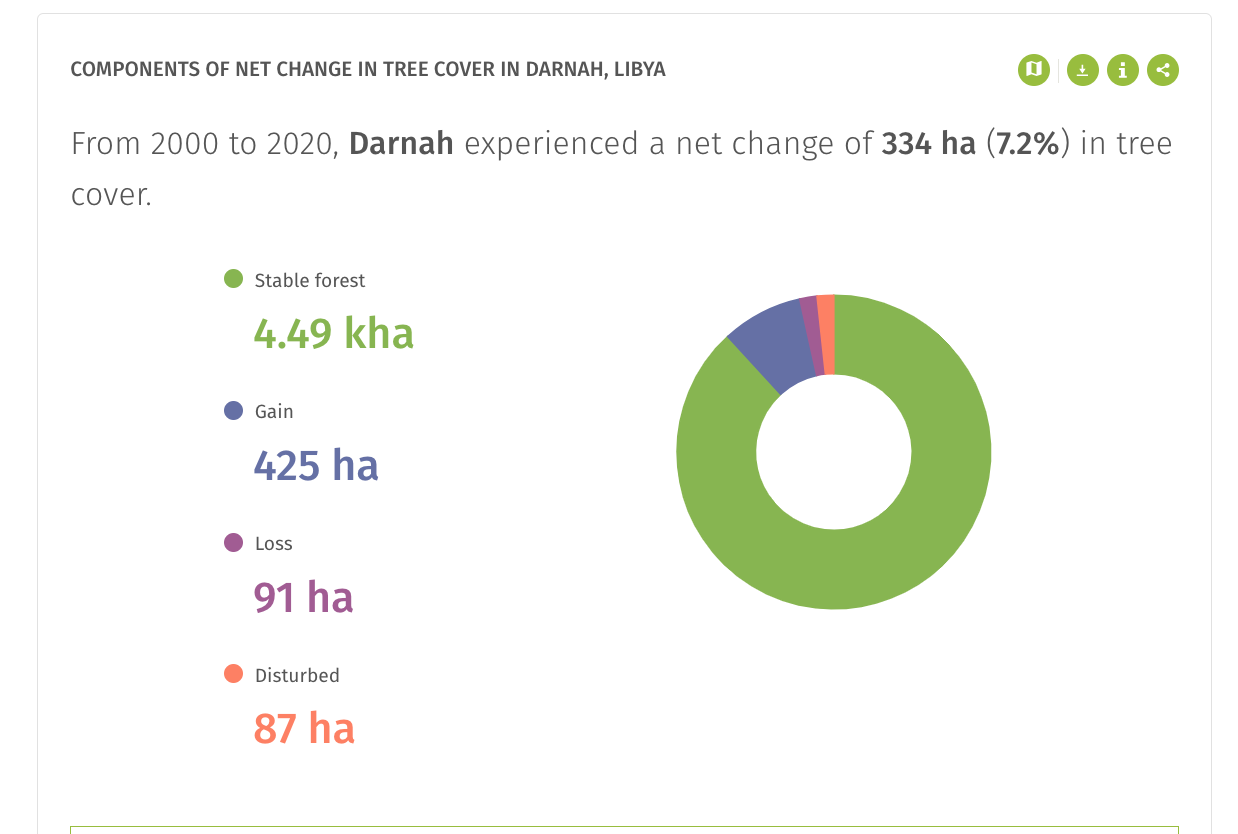

### Libya Summary

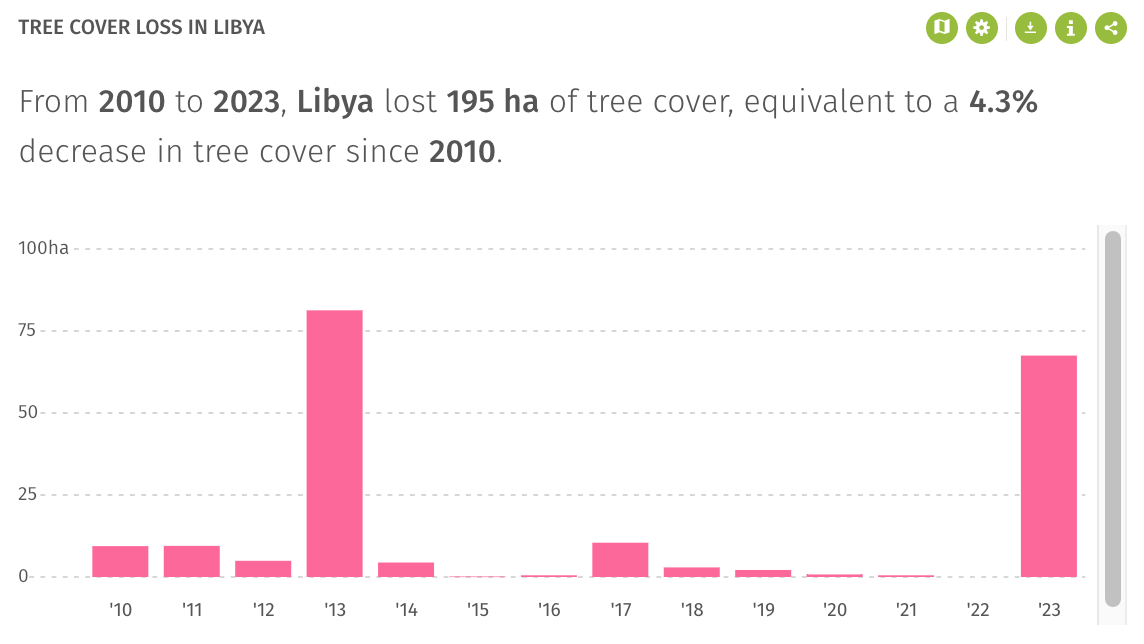

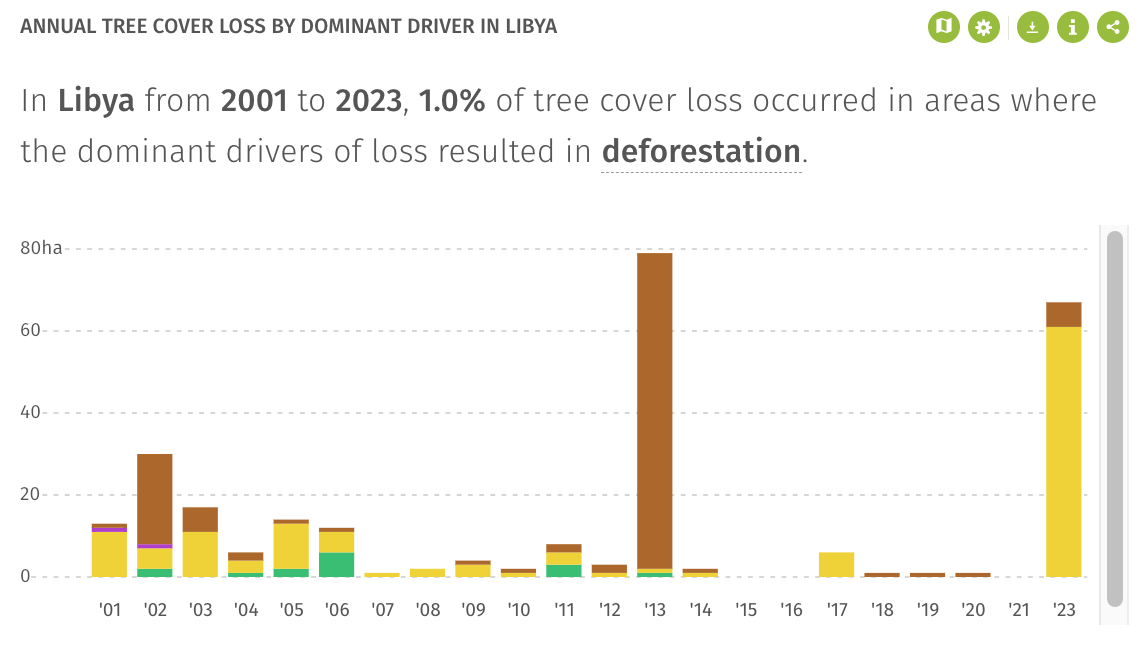

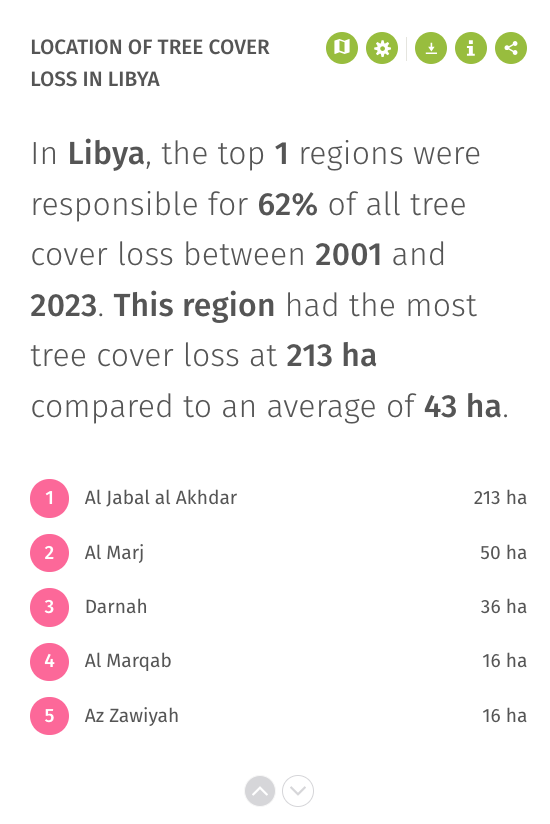

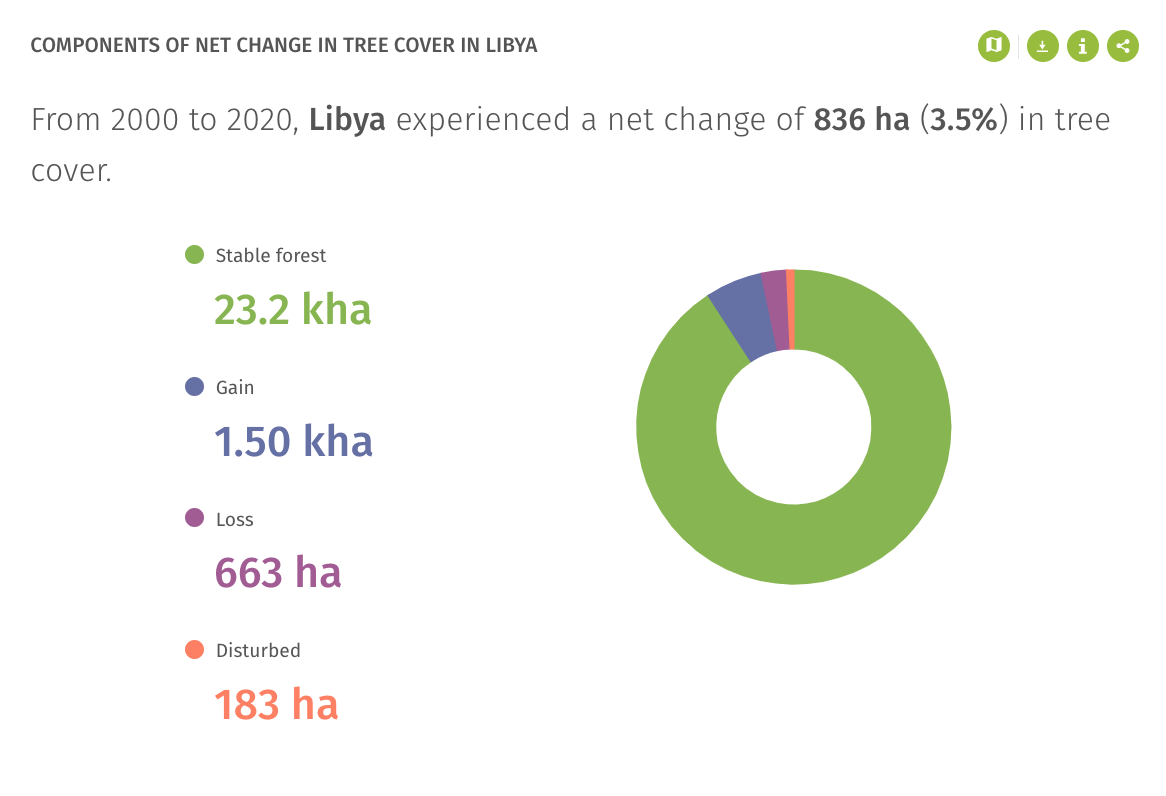